<a href="https://colab.research.google.com/github/bmulas1535/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading Datasets

This assignment is purposely semi-open-ended you will be asked to load datasets both from github and also from CSV files from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Remember that the UCI datasets may not have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally, on github, using the `!curl` shell command, or in some other way before you try and read it in as a dataframe, this will help you catch what would otherwise be unforseen problems.


## 1) Load a dataset from Github (via its *RAW* URL)

Pick a dataset from the following repository and load it into Google Colab. Make sure that the headers are what you would expect and check to see if missing values have been encoded as NaN values:

<https://github.com/ryanleeallred/datasets>

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# First, we will import pandas and use it to read in the csv file
import pandas as pd

# I will define a variable with the string URL for ease of reading the following code
data_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv'

# Now we bring in the file from the specified URL, and assign it to it's own, unique variable.
dataframe_1 = pd.read_csv(data_url)

# To ensure we've got the file loaded correctly, lets read the first few lines 
# of our DataFrame object
dataframe_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# The above readout from our file appears to have good indices and column headers. Excellent!
# Now, I'll check for NaN values, and cross reference that a couple of ways
# To make sure that NaN values are listed as NaN's, if any exist.

# First, we assign the null values to a variable we can iterate through.
nulls = dataframe_1.isnull().sum()

# This loop will generate a list called y, that will contain the null values.
for x in nulls:
    y = []
    y.append(x)

# This loop will check the values in y, and if any are greater than 0, will inform use that it had some, and how many. Otherwise,
# it will inform us that none were found.
for z in range(len(y)):
    if z > 0:
        print('This dataframe contains NaN values!')
        print('Found',z,'NaN values!')

    else:
        print('No null values were found.')
    break

No null values were found.


In [0]:
# The loops above indicate that there are no NaN values in the dataset.
# A look over the data personally, however, shows some abnormal values!

# The skin thickness column shouldn't have any value x <= 0
# Otherwise, they would have no skin!

# Lets look at that column specifically using the following code:
pos = 3
name = df.columns[pos]

# name now contains that column. We can reference that column to see how many instances of 0 occur.
def zerocounter(k):
    # Make an empty list
    y = []
    
    # Iterate through the column, find all instances of a 0.
    for x1 in dataframe_1[k]:
        if x1 <= 0:
            
            # Put all those zeros into a list.
            y.append(x1)
            
    # Return the length of that list, effectively telling how many zeros were in the column.
    return len(y)

print('Skin Thickness feature has',zerocounter(name),'\'0\'s, where none should be present')

Skin Thickness feature has 227 '0's, where none should be present


In [0]:
# Now we can do the same thing for other columns that shouldn't have 0's.

# Create a  dictionary to store index : value pairs
sample_dict = {}

# Lets keep things organized by using a copy for now.
df1 = dataframe_1.copy()

# Drop columns that we can expect 0's to exist in.
df1 = df1.drop(['Pregnancies', 'Insulin', 'Outcome'], axis=1)

# This loop will put each 0 into the dictionary for each index column.
for i in df1:
        for y in df1[i]:
            if y is 0:
                if i not in sample_dict:
                    sample_dict[i] = [y]
                else:
                    sample_dict[i].append(y)
            else:
                continue

# Now we loop through the dictionary, and print the Key (column name), and the number of 0's counted.
for key, value in sample_dict.items():
    print(key, value.count(0))

Glucose 5
BloodPressure 35
SkinThickness 227


In [0]:
# Take the 0's, and replace them with NaN to fufill our objective!
import numpy as np

cols = ['Glucose', 'BloodPressure', 'SkinThickness']
dataframe_1[cols] = dataframe_1[cols].replace({0:np.nan})

In [0]:
dataframe_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


## 2) Load a dataset from your local machine
Download a dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and then upload the file to Google Colab either using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

While you are free to try and load any dataset from the UCI repository, I strongly suggest starting with one of the most popular datasets like those that are featured on the right-hand side of the home page. 

Some datasets on UCI will have challenges associated with importing them far beyond what we have exposed you to in class today, so if you run into a dataset that you don't know how to deal with, struggle with it for a little bit, but ultimately feel free to simply choose a different one. 

- Make sure that your file has correct headers, and the same number of rows and columns as is specified on the UCI page. If your dataset doesn't have headers use the parameters of the `read_csv` function to add them. Likewise make sure that missing values are encoded as `NaN`.

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed
import pandas as pd

# This was done on my local machine.
# Bring in the data from local file.
dataloc = "switzerland.data"
data = pd.read_csv(dataloc)

# Check the first few lines...
data.head()

,32,1,1.1,95,0,?,0.1,127,0.2,.7,1.2,?.1,?.2,1.3
0,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
1,35,1,4,?,0,?,0,130,1,?,?,?,7,3
2,36,1,4,110,0,?,0,125,1,1,2,?,6,1
3,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
4,38,0,4,110,0,0,0,156,0,0,2,?,3,1


In [0]:
# Need to fix the headers!

col_names = ['age',
            'sex',
            'cp',
            'trestbps',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'num']
data = pd.read_csv(dataloc, names=col_names)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [0]:
# To fix the ?'s, I will replace with NaNs

import numpy as np

data = data.replace({'?': np.nan})
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2


## 3) Load a dataset from UCI using `!wget`

"Shell Out" and try loading a file directly into your google colab's memory using the `!wget` command and then read it in with `read_csv`.

With this file we'll do a bit more to it.

- Read it in, fix any problems with the header as make sure missing values are encoded as `NaN`.
- Use the `.fillna()` method to fill any missing values. 
 - [.fillna() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- Create one of each of the following plots using the Pandas plotting functionality:
 - Scatterplot
 - Histogram
 - Density Plot


In [0]:
import pandas as pd
import numpy as np

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data

--2019-09-03 23:39:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4109 (4.0K) [application/x-httpd-php]
Saving to: ‘processed.switzerland.data’

processed.switzerla 100%[===================>]   4.01K  --.-KB/s    in 0s      

2019-09-03 23:39:47 (99.4 MB/s) - ‘processed.switzerland.data’ saved [4109/4109]



In [0]:
# Copy and pasted to save time
col_names = ['age',
            'sex',
            'cp',
            'trestbps',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'num']

data_2 = pd.read_csv('processed.switzerland.data', names=col_names)
data_2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [0]:
# Replace all '?' with NaN.
data_2 = data_2.replace({'?': np.nan})
data_2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2


In [0]:
# For the assignment's sake, I will input some value for NaN.
# Normally, this would be done using a specific methodology. 
# For now, it will be a '1'.
data_2.fillna(1, inplace= True)
data_2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,1,0,127,0,.7,1,1,1,1
1,34,1,4,115,0,1,1,154,0,.2,1,1,1,1
2,35,1,4,1,0,1,0,130,1,1,1,1,7,3
3,36,1,4,110,0,1,0,125,1,1,2,1,6,1
4,38,0,4,105,0,1,0,166,0,2.8,1,1,1,2


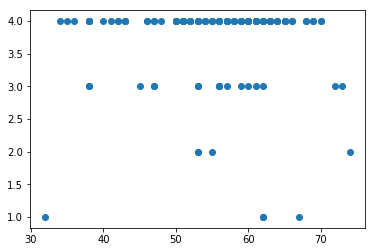

In [0]:
# Our histogram:

import matplotlib.pyplot as plt

plt.scatter(data_2['age'], data_2['cp'])

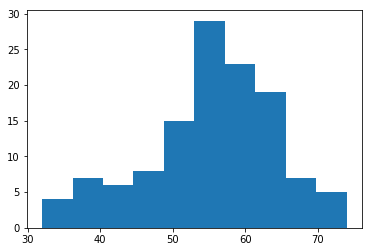

In [0]:
# Histogram:
plt.hist(data_2['age'])
plt.show();

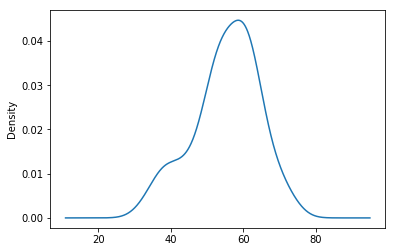

In [0]:
# density plot:
data_2['age'].plot(kind = 'density');

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [14]:
# This is rather vague, so I will interpret this goal to mean
# importing data from a non-file source!

# Good options are listed, but I want to try something a little more... raw.

import requests
import pandas as pd
from bs4 import BeautifulSoup

# First I will open this url (from cars.com) that displays some sedans in my local area for sale.
loc = 'https://www.cars.com/for-sale/searchresults.action/?bsId=20211&dealerType=all&page=1&perPage=100&rd=30&searchSource=PAGINATION&sort=relevance&stkTypId=28881&zc=93955'
res = requests.get(loc, timeout=10)
contents = BeautifulSoup(res.content, "html.parser")

# This iteration loops over all items inside the div with class "shop-srp-listings__listing-container".
# And picks out the specified spans / h2 tags with the identified classes.
# It then puts that data into the dictionary.
carArray = []
for item in contents.findAll('div', attrs={'class': 'shop-srp-listings__listing-container'}):
  carObject = {
      'Make and Model': item.find('h2', attrs={'class': 'listing-row__title'}).text.strip(),
      'Mileage': item.find('span', attrs={'class': 'listing-row__mileage'}).text.strip(),
      'Price': item.find('span', attrs={'class': 'listing-row__price'}).text.strip()
  }
  # Then we place the dictionary keys and values into a list.
  # This puts the data into a comma seperated format.
  carArray.append(carObject)
  
# To see how this looks, I can print it.
print(carArray)

[{'Make and Model': '2017 Chrysler 300 Limited', 'Mileage': '89,090 mi.', 'Price': '$14,500'}, {'Make and Model': '2012 Honda Accord EX-L', 'Mileage': '200,930 mi.', 'Price': '$8,988'}, {'Make and Model': '2015 Honda Accord LX', 'Mileage': '24,966 mi.', 'Price': '$15,919'}, {'Make and Model': '2012 Honda Civic Natural Gas', 'Mileage': '29,417 mi.', 'Price': '$10,175'}, {'Make and Model': '2014 Honda Civic LX', 'Mileage': '67,221 mi.', 'Price': '$12,995'}, {'Make and Model': '2014 Honda Civic Si', 'Mileage': '58,422 mi.', 'Price': '$15,860'}, {'Make and Model': '2019 Subaru Legacy 2.5i Premium', 'Mileage': '12,464 mi.', 'Price': '$22,917'}, {'Make and Model': '2013 Hyundai Sonata GLS', 'Mileage': '75,697 mi.', 'Price': '$9,000'}, {'Make and Model': '2017 Mazda Mazda3 Sport', 'Mileage': '56,808 mi.', 'Price': '$14,420'}, {'Make and Model': '2019 Mercedes-Benz CLA 250 Base', 'Mileage': '22,445 mi.', 'Price': '$28,390'}, {'Make and Model': '2016 Ford Fusion SE', 'Mileage': '88,641 mi.', 'P

In [15]:
# Now that I have list, I can read it into pandas dataframe object.

# This should satisfy the stretch goal as I have interpreted it.
# This data definitely would need additional processing!

data = pd.DataFrame(carArray)
print(data.dtypes)
print()
print('The length of the dataframe is',len(data))
print()
print(data.head())

Make and Model    object
Mileage           object
Price             object
dtype: object

The length of the dataframe is 100

                 Make and Model      Mileage    Price
0     2017 Chrysler 300 Limited   89,090 mi.  $14,500
1        2012 Honda Accord EX-L  200,930 mi.   $8,988
2          2015 Honda Accord LX   24,966 mi.  $15,919
3  2012 Honda Civic Natural Gas   29,417 mi.  $10,175
4           2014 Honda Civic LX   67,221 mi.  $12,995


I hope this has been sufficient for this goal. Thank you!